pip install tensorflow \
pip install matplotlib \
pip install seaborn \
pip install pandas \
pip install numpy \
pip install scikit-learn

In [2]:
import tensorflow as tf #importowanie wymaganych bibliotek
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
path = '/Users/luke/Documents/notowania/csv/'

data = pd.read_csv(path + 'integrated_data.csv') #wczytanie pliku


print("Dane przed usunięciem NaN:",len(data), "liczba kolumn:",len(data.columns))#wyświetlenie liczby rekordów i kolumn

# data = data.drop('Wolumen_ftse250_d', 1)#usunięcie kolumny z pustymi wartościami

# TODO: Dodać do sprawozdania ile było NaN i jak sobie z tym poradziliśmy 

data['Zamkniecie'] = data['Zamkniecie'].shift(-1) #przesunięcie kolumny prognowanej o jeden indeks - prognoza ma być na nastęną sesję - można zmienić i prognozować na większą liczbę sesji do przodu
data = data.dropna() #usunięcie danych Not a number
print("Dane po usunięciu NaN:",len(data), "liczba kolumn:",len(data.columns))


Dane przed usunięciem NaN: 3202 liczba kolumn: 56
Dane po usunięciu NaN: 3199 liczba kolumn: 56


In [4]:
print(data.head())#wyświetlenie nagłówka tabeli, aby sprawdzić poprawność poprzednich operacji na danych

         Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
1  2010-06-29   41.8778    42.1122    41.5896     41.8611  2.854288e+07   
2  2010-06-30   41.8454    42.2485    41.7719     41.8651  2.229638e+07   
3  2010-07-01   41.8592    41.9926    41.5670     41.8710  2.535009e+07   
4  2010-07-02   42.1122    42.2328    41.7101     41.8710  1.485732e+07   
5  2010-07-06   42.1720    42.2408    41.5817     42.9555  2.179526e+07   

   Otwarcie_brk-a_us_d  Najwyzszy_brk-a_us_d  Najnizszy_brk-a_us_d  \
1             120300.0              121950.0              119405.0   
2             119530.0              121102.0              119085.0   
3             119394.0              119499.0              116975.0   
4             118000.0              118703.0              115037.0   
5             116700.0              118306.0              115165.0   

   Zamkniecie_brk-a_us_d  ...  Otwarcie_t_us_d  Najwyzszy_t_us_d  \
1               120199.0  ...          9.12768           9.1

In [5]:
data.describe()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Otwarcie_brk-a_us_d,Najwyzszy_brk-a_us_d,Najnizszy_brk-a_us_d,Zamkniecie_brk-a_us_d,Wolumen_brk-a_us_d,...,Otwarcie_t_us_d,Najwyzszy_t_us_d,Najnizszy_t_us_d,Zamkniecie_t_us_d,Wolumen_t_us_d,Otwarcie_ms_us_d,Najwyzszy_ms_us_d,Najnizszy_ms_us_d,Zamkniecie_ms_us_d,Wolumen_ms_us_d
count,3199.000000,3199.000000,3199.000000,3199.000000,3.199000e+03,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,...,3199.000000,3199.000000,3199.000000,3199.000000,3.199000e+03,3199.000000,3199.000000,3199.000000,3199.000000,3.199000e+03
mean,101.826518,102.525599,101.100869,101.873692,1.018465e+07,255277.776901,256901.530525,253362.163701,255149.386915,719.309159,...,17.296637,17.426458,17.160303,17.294993,5.754154e+07,39.662103,40.129060,39.194006,39.664805,1.577957e+07
std,40.531201,40.873652,40.173924,40.519074,5.817991e+06,108081.457596,108936.967857,106863.421589,107860.290468,863.811146,...,3.288998,3.319187,3.261137,3.290287,2.875910e+07,24.286964,24.575268,24.017192,24.304880,1.037988e+07
min,40.595200,40.712800,40.299000,40.409800,2.225166e+06,99990.000000,100720.000000,98952.000000,100000.000000,43.000000,...,8.904470,8.955700,8.809320,8.878850,1.378271e+07,9.426340,10.160200,9.189700,9.888430,2.279337e+06
25%,69.436150,69.774500,68.882600,69.436600,6.628285e+06,171198.000000,172400.000000,170407.500000,171310.225000,247.500000,...,15.537600,15.648200,15.418250,15.527700,4.093840e+07,21.788100,21.988300,21.546750,21.830300,9.165130e+06
50%,100.213000,100.791000,99.643800,100.292000,8.712849e+06,227651.020000,228870.000000,226515.000000,227886.000000,396.000000,...,17.726900,17.890000,17.553200,17.704200,5.157750e+07,32.597800,32.953900,32.299600,32.654700,1.261385e+07
75%,130.701000,131.844000,129.397500,130.838500,1.229927e+07,317550.000000,319375.000000,315000.000000,317082.000000,711.000000,...,19.598300,19.763500,19.436950,19.583700,6.556526e+07,46.128000,46.575400,45.529100,45.989200,1.877642e+07
max,181.519000,183.078000,180.618000,182.411000,1.315653e+08,544389.260000,544389.260000,533345.070000,539180.000000,6501.000000,...,24.317400,24.452700,24.199500,24.408800,3.626974e+08,105.241000,106.743000,104.231000,105.761000,9.659570e+07


/var/folders/w5/pynpqnq954516bb6qs8xqrk00000gn/T/ipykernel_10329/3195851551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr())


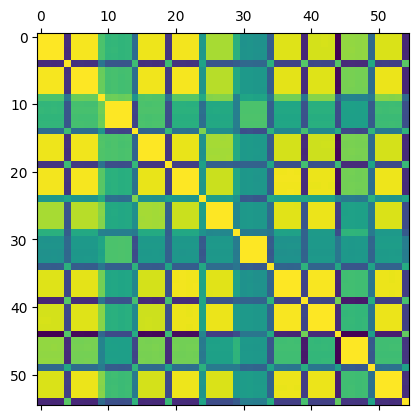

In [6]:
plt.matshow(data.corr())

In [10]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);

/var/folders/w5/pynpqnq954516bb6qs8xqrk00000gn/T/ipykernel_10329/2092112650.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


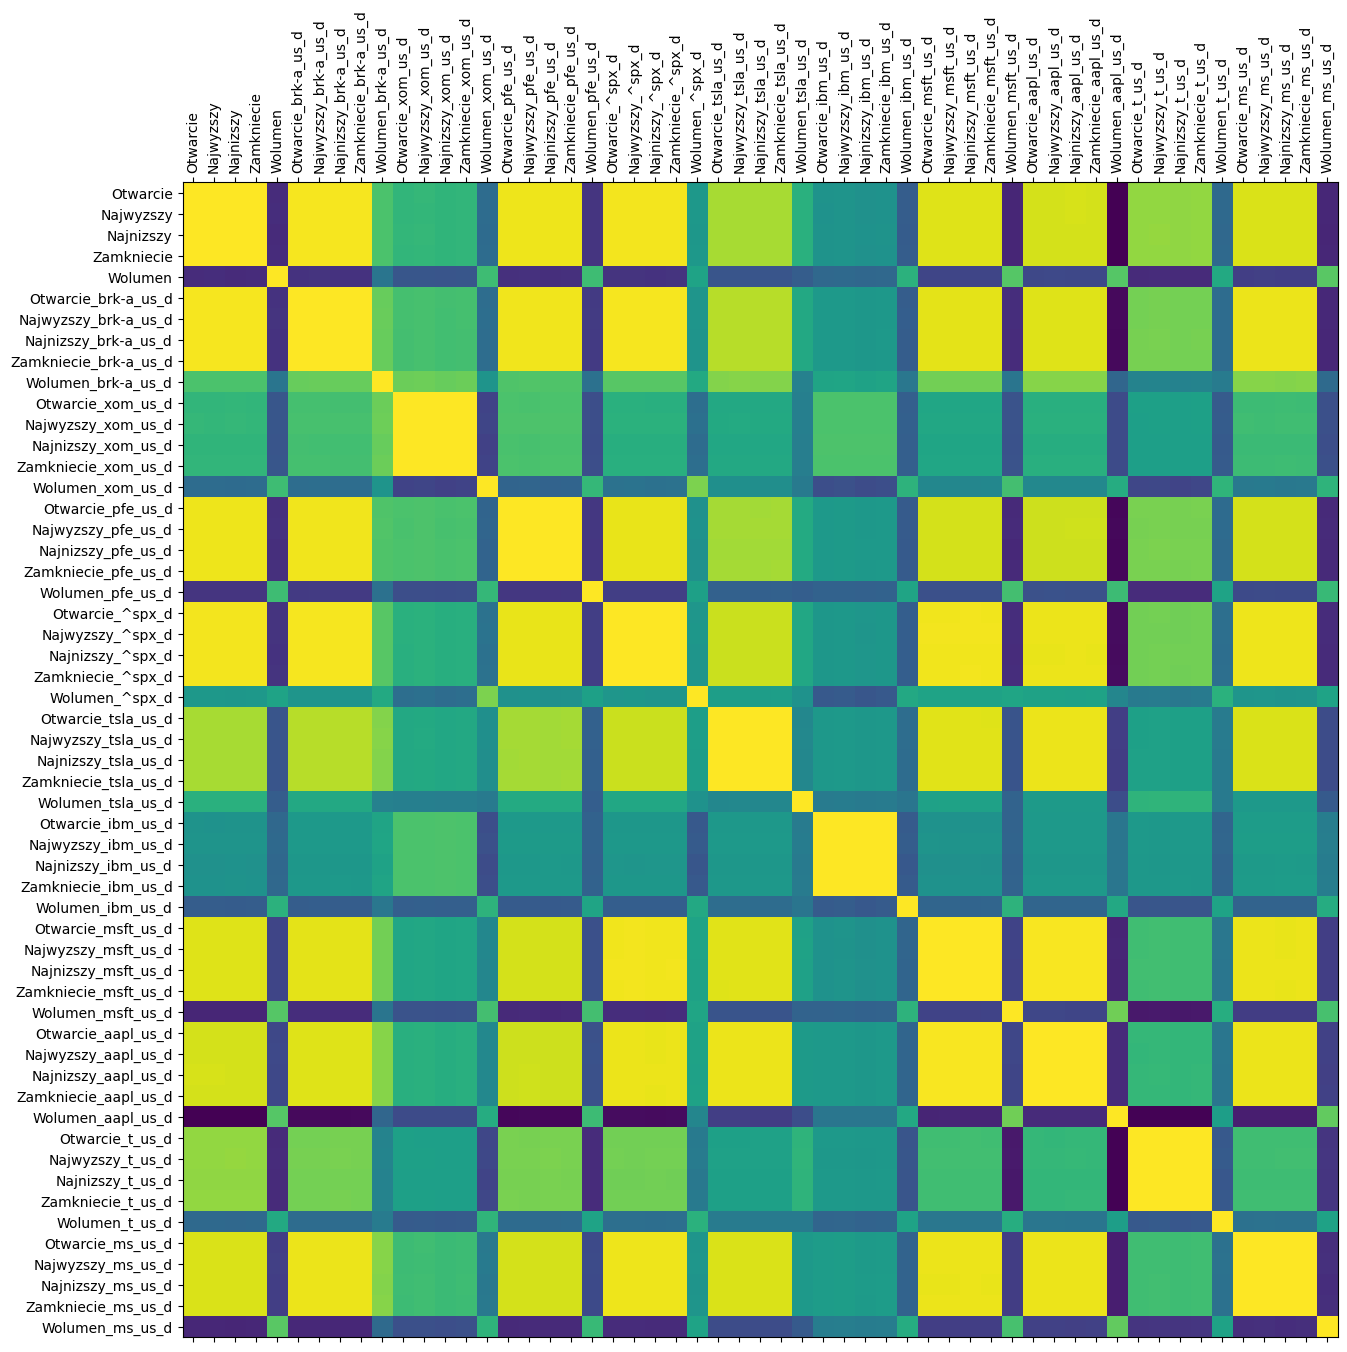

In [13]:
plot_corr(data,15)

In [8]:
corr = data.corr()
corr.style.background_gradient()

/var/folders/w5/pynpqnq954516bb6qs8xqrk00000gn/T/ipykernel_10329/3250758911.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Otwarcie_brk-a_us_d,Najwyzszy_brk-a_us_d,Najnizszy_brk-a_us_d,Zamkniecie_brk-a_us_d,Wolumen_brk-a_us_d,Otwarcie_xom_us_d,Najwyzszy_xom_us_d,Najnizszy_xom_us_d,Zamkniecie_xom_us_d,Wolumen_xom_us_d,Otwarcie_pfe_us_d,Najwyzszy_pfe_us_d,Najnizszy_pfe_us_d,Zamkniecie_pfe_us_d,Wolumen_pfe_us_d,Otwarcie_^spx_d,Najwyzszy_^spx_d,Najnizszy_^spx_d,Zamkniecie_^spx_d,Wolumen_^spx_d,Otwarcie_tsla_us_d,Najwyzszy_tsla_us_d,Najnizszy_tsla_us_d,Zamkniecie_tsla_us_d,Wolumen_tsla_us_d,Otwarcie_ibm_us_d,Najwyzszy_ibm_us_d,Najnizszy_ibm_us_d,Zamkniecie_ibm_us_d,Wolumen_ibm_us_d,Otwarcie_msft_us_d,Najwyzszy_msft_us_d,Najnizszy_msft_us_d,Zamkniecie_msft_us_d,Wolumen_msft_us_d,Otwarcie_aapl_us_d,Najwyzszy_aapl_us_d,Najnizszy_aapl_us_d,Zamkniecie_aapl_us_d,Wolumen_aapl_us_d,Otwarcie_t_us_d,Najwyzszy_t_us_d,Najnizszy_t_us_d,Zamkniecie_t_us_d,Wolumen_t_us_d,Otwarcie_ms_us_d,Najwyzszy_ms_us_d,Najnizszy_ms_us_d,Zamkniecie_ms_us_d,Wolumen_ms_us_d
Otwarcie,1.000000,0.999845,0.999787,0.999232,-0.494646,0.975527,0.975484,0.975771,0.975566,0.515744,0.416370,0.424207,0.408507,0.415455,-0.109012,0.958207,0.957369,0.958465,0.957640,-0.450898,0.971471,0.971716,0.971082,0.971343,0.197611,0.773163,0.773236,0.773240,0.773281,0.374222,0.165439,0.172807,0.154671,0.162811,-0.209115,0.915437,0.915405,0.915487,0.915397,-0.529008,0.892624,0.892426,0.892982,0.892656,-0.712661,0.720444,0.724908,0.715649,0.719393,-0.129272,0.905137,0.905461,0.905099,0.905217,-0.525012
Najwyzszy,0.999845,1.000000,0.999733,0.999405,-0.491256,0.975423,0.975486,0.975659,0.975559,0.516349,0.414622,0.422596,0.406692,0.413782,-0.104919,0.957966,0.957329,0.958272,0.957604,-0.449364,0.971217,0.971563,0.970795,0.971157,0.202227,0.773281,0.773343,0.773305,0.773366,0.375994,0.162933,0.170698,0.152148,0.160633,-0.206407,0.915734,0.915767,0.915764,0.915734,-0.526649,0.892802,0.892650,0.893145,0.892863,-0.711810,0.719719,0.724439,0.714932,0.718893,-0.126893,0.904587,0.904980,0.904514,0.904708,-0.522944
Najnizszy,0.999787,0.999733,1.000000,0.999387,-0.500005,0.975572,0.975519,0.975938,0.975719,0.514742,0.417990,0.425748,0.410337,0.417180,-0.114074,0.958180,0.957412,0.958693,0.957856,-0.452771,0.971624,0.971860,0.971395,0.971619,0.191948,0.773361,0.773385,0.773461,0.773479,0.372203,0.167771,0.175153,0.157454,0.165527,-0.211994,0.915008,0.914955,0.915140,0.915027,-0.531955,0.892417,0.892199,0.892850,0.892500,-0.714021,0.721157,0.725533,0.716678,0.720305,-0.132207,0.905546,0.905807,0.905590,0.905654,-0.527452
Zamkniecie,0.999232,0.999405,0.999387,1.000000,-0.496025,0.975093,0.975169,0.975434,0.975379,0.514685,0.415298,0.423257,0.407555,0.414660,-0.109235,0.957706,0.957110,0.958191,0.957584,-0.451189,0.971105,0.971451,0.970822,0.971214,0.196932,0.773317,0.773408,0.773380,0.773497,0.375120,0.163912,0.171684,0.153478,0.162068,-0.208501,0.915143,0.915186,0.915260,0.915264,-0.529628,0.892378,0.892233,0.892798,0.892553,-0.713260,0.720070,0.724745,0.715517,0.719464,-0.128892,0.904494,0.904851,0.904500,0.904708,-0.525169
Wolumen,-0.494646,-0.491256,-0.500005,-0.496025,1.000000,-0.460930,-0.458842,-0.464190,-0.461749,-0.047165,-0.256780,-0.255017,-0.260364,-0.257542,0.468826,-0.475204,-0.471639,-0.479712,-0.475818,0.466838,-0.457617,-0.455432,-0.461806,-0.459044,0.282419,-0.262888,-0.262258,-0.264171,-0.263426,-0.205276,-0.131999,-0.127293,-0.139145,-0.133822,0.384379,-0.354650,-0.353375,-0.356430,-0.355100,0.549500,-0.339373,-0.338299,-0.340946,-0.339840,0.546778,-0.500720,-0.496508,-0.504374,-0.499882,0.327649,-0.394128,-0.391871,-0.397195,-0.394740,0.560769
Otwarcie_brk-a_us_d,0.975527,0.975423,0.975572,0.975093,-0.460930,1.000000,0.999852,0.999827,0.999685,0.603252,0.492628,0.500464,0.485092,0.492035,-0.098358,0.963368,0.963179,0.963651,0.963234,-0.420785,0.978815,0.979109,0.978274,0.978566,0.176497,0.814576,0.814661,0.814566,0.814550,0.318671,0.205493,0.212705,0.195096,0.203181,-0.205947,0.929622,0.929506,0.929588,0.929439,-0.492677,0.916877,0.916570,0.917397,0.916898

In [9]:
corr.to_csv(path + 'correlations.csv')

In [26]:
import sklearn

from sklearn.preprocessing import MinMaxScaler

class BatchedData():
    from sklearn.preprocessing import MinMaxScaler

    def __init__(self,data,num_days,scaler=MinMaxScaler()):
        self.scaler = scaler
        self.data = data
        self.num_days = num_days
        
        #ogólnie zmienne z literą "X" dotyczą zbioru wejściowego, natomiast z literą "Y" dotyczą zbioru wyjściowego
        
        self.X = self.scaler.fit_transform(self.data.drop(columns=['Data','Zamkniecie']))#normalizacja danych i usunięcie kolumn, które nie mają być danymi wejściowymi
        self.y = self.data['Zamkniecie'].values/np.max(self.data['Zamkniecie'])#wartość kolumny "Zamknięcie" jest prognozowana na wyjściu sieci
        
        self.rng = np.random.randint(1,len(self.data)-self.num_days)#losowe wybieranie rekordów do zbiorów testowych i uczących
        self.x_batch = self.X[self.rng:self.rng+self.num_days,:]
        self.y_batch = self.y[self.rng-1]

    def nextBatch(self):
        rng = np.random.randint(1,len(self.data)-self.num_days)
        
        while(True):
            rng = np.random.randint(1,len(self.data)-self.num_days)
            
            if rng != self.rng:
                self.rng = rng
                break
                
        self.x_batch = self.X[self.rng:self.rng+self.num_days,:].reshape([self.num_days,self.X.shape[1]])
        self.y_batch = self.y[self.rng-1]
        
    def createDataset(self):
        train_range = int(len(self.data) * 0.67)# zbiór uczący
        test_range = int(len(self.data) * 0.33)#zbiór testowy
        
        self.X_train = np.zeros([train_range,num_days,self.X.shape[1]])
        self.Y_train = np.zeros([train_range])

        for i in range(train_range):
            self.nextBatch()
            self.X_train[i,:,:] = self.x_batch
            self.Y_train[i] = self.y_batch

        self.X_test = np.zeros([test_range,num_days,self.X.shape[1]])
        self.Y_test = np.zeros([test_range])

        for i in range(test_range):
            self.nextBatch()
            self.X_test[i,:,:] = self.x_batch
            self.Y_test[i] = self.y_batch

In [27]:
num_days = 7 #liczba dni historycznych
batched_data = BatchedData(data,num_days)
batched_data.createDataset()#utworzony jest zbiór z danymi historycznymi

len(np.unique(batched_data.Y_train))

1466

In [31]:
data_size = int(batched_data.x_batch.shape[1])
#print(data_size)
#tworzenie modelu
model = Sequential()

model.add(LSTM(units=77,activation='relu',input_shape=[num_days,data_size],return_sequences=True))
#tworzenie warstwy LSTM, podajemy liczbę neuronow, rodzaj funkcji aktywacji, liczbę historycznych notowań, rozmiar danych, zwracana jest sekwencja danych taka, jaka jest liczba historycznych notowań
#model.add(LSTM(units=100,activation='relu',return_sequences=True))
#model.add(LSTM(units=74,activation='relu',return_sequences=True))
model.add(Dropout(rate=0.5))

#model.add(LSTM(units=56,activation='softmax',return_sequences=True))
#model.add(LSTM(units=42,activation='softmax',return_sequences=True))
model.add(LSTM(units=37,activation='softmax',return_sequences=True))
model.add(Dropout(rate=0.5))

model.add(LSTM(units=24,activation='relu',return_sequences=True))
model.add(LSTM(units=12,activation='relu',return_sequences=True))
model.add(Dropout(rate=0.3))

model.add(LSTM(units=6,activation='sigmoid',return_sequences=True))
model.add(Flatten())
model.add(Dense(units=1,activation='sigmoid'))


In [42]:
# zmiana optymizera dla MacOS
from tensorflow.keras.optimizers.legacy import Adam
adam = tf.keras.optimizers.legacy.Adam()

model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])#kompilacja modelu, funkcja oceny i metryka to błąd średniokwadratowy

In [43]:
epochs = 60 #liczba epok uczących
batch=32
#uczenie modelu, podajemy jako parametry dane ze zbioru uczącego (wejście i wyjćie) i dane ze zbioru testowego (wejście i wyjćie)


history = model.fit(batched_data.X_train,batched_data.Y_train,
                    validation_data=(batched_data.X_test,batched_data.Y_test),
                    epochs=epochs,
                    batch_size=batch)

Epoch 1/60


2023-03-26 14:11:25.084509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - ETA: 0s - loss: 0.0567 - mse: 0.0567WARNING:tensorflow:From /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/autograph/pyct/static_analysis/liveness.py:83: Analyzer.lamba_check (from tensorflow.python.autograph.pyct.static_analysis.liveness) is deprecated and will be removed after 2023-09-23.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the 

2023-03-26 14:12:27.141547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 68s 925ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0484 - val_mse: 0.0484
Epoch 2/60
67/67 [==============================] - 45s 674ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 3/60
67/67 [==============================] - 50s 745ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4/60
67/67 [==============================] - 51s 766ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 5/60
67/67 [==============================] - 49s 738ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 6/60
67/67 [==============================] - 49s 732ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/60
67/67 [==============================] - 48s 721ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 8/60
67/67 [==============================] - 48s 722ms/step - loss: 0.001

In [45]:
print(history.history['val_loss'])

[0.04842105507850647, 0.01851472817361355, 0.008064438588917255, 0.0034870775416493416, 0.0024423785507678986, 0.0029558599926531315, 0.0031201099045574665, 0.0026914235204458237, 0.002441298682242632, 0.004200861789286137, 0.0036512352526187897, 0.003296956652775407, 0.003328501945361495, 0.0029206194449216127, 0.001955663086846471, 0.0028307773172855377, 0.003255946561694145, 0.0022926644887775183, 0.004153531044721603, 0.0023588777985423803, 0.002336485544219613, 0.0030397854279726744, 0.0030676841270178556, 0.0025250990875065327, 0.0027628967072814703, 0.002390534384176135, 0.002300538122653961, 0.0029778361786156893, 0.002549179829657078, 0.0024696907494217157, 0.0023883264511823654, 0.0023876107297837734, 0.0030537438578903675, 0.001678234082646668, 0.002661718288436532, 0.0029490506276488304, 0.002616344252601266, 0.0027378371451050043, 0.0023956242948770523, 0.003029364161193371, 0.002650568960234523, 0.003386192722246051, 0.0020886335987597704, 0.0025237116497009993, 0.0025694

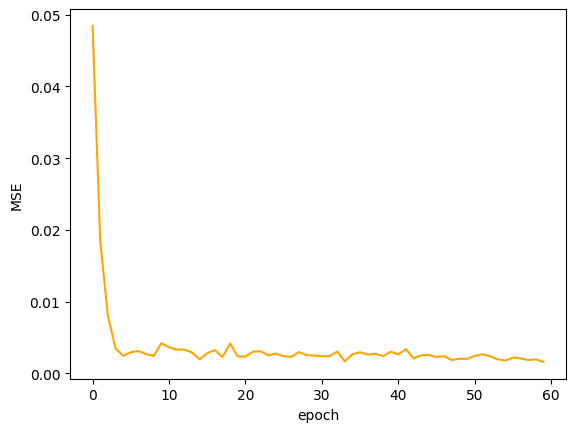

In [46]:
plt.plot(history.history['val_loss'],color='orange')#wykres procesu uczenia się - wyniki danych testowych
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

In [47]:
Y_pred=model.predict(batched_data.X_test)#dokonujemy predykcji z wykorzystaniem nauczonego modelu


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2023-03-26 15:06:17.112428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 3s 67ms/step


In [48]:
for i in range(len(batched_data.Y_test)):
            print(Y_pred[i,0],'\t',batched_data.Y_test[i]) #wyświetlenie wartości prognozowanych i faktycznych


0.6998478 	 0.7554478622451496
0.48334262 	 0.5424464533388885
0.6562963 	 0.7092116155275723
0.96300083 	 0.9709885916967727
0.6101855 	 0.6810389724303907
0.40868694 	 0.4394559538624316
0.28489715 	 0.28035096567641205
0.70167184 	 0.7473781734654161
0.38684237 	 0.4075220244393156
0.4829314 	 0.5348164310266377
0.6403215 	 0.7028139750344004
0.36325127 	 0.36816913453684263
0.4827528 	 0.5344458393408292
0.23190837 	 0.23961109801492236
0.5847778 	 0.6530801322288678
0.7918335 	 0.8328609568501899
0.43929663 	 0.4756368859334141
0.39775082 	 0.4314674005405376
0.59372556 	 0.6616322480552159
0.24967974 	 0.25562109741188854
0.92660505 	 0.919950003015169
0.71440274 	 0.7663079529195058
0.4062332 	 0.42828393024543476
0.5952886 	 0.6555525708427672
0.38667628 	 0.41571012713049105
0.6270102 	 0.691197351036944
0.41881746 	 0.45024587333000754
0.26742837 	 0.2662333960123019
0.8184627 	 0.8489345489033008
0.38390008 	 0.39824297876772785
0.6991875 	 0.7571692496614788
0.36677247 	 0.